In [ ]:
# @title
from IPython.display import HTML

HTML("""
<div style="background: #e6f2ff; padding: 30px; border-radius: 20px; font-family: Arial, sans-serif; animation: fadeIn 2s;">

  <h1 style="color: #004080; font-size: 36px;">📊 Bienvenid@s a la clase de <em>Series Temporales con TBATS</em> ⏳</h1>

  <p style="font-size: 18px; color: #003366; margin-top: 20px;">
    Esta clase está orientada a descubrir patrones de comportamiento en datos cronológicos 📈
    y anticipar su evolución futura 🔮.
    Hoy exploraremos un modelo poderoso y flexible: <strong>TBATS</strong> 🧠,
    ideal para escenarios complejos con múltiples estacionalidades 🔄.
  </p>

  <hr style="margin: 30px 0; border-top: 2px dashed #66a3ff;">

  <h2 style="color: #004080; font-size: 28px;">👨‍🏫 Docente a cargo</h2>

  <p style="font-size: 18px; color: #003366;">
    <strong>Julio Alberto Paredes Rojas</strong><br>
    🧠 Ingeniero Industrial especializado en Ciencia de Datos y Optimización Industrial<br>
    💡 Experto en IA, pronóstico de la demanda y toma de decisiones basadas en datos<br>
    🏛️ Profesor y mentor en múltiples instituciones de educación superior
  </p>

  <hr style="margin: 30px 0; border-top: 2px solid #99ccff;">

  <h2 style="color: #004080; font-size: 26px;">🧭 ¿Qué veremos hoy?</h2>

  <ul style="font-size: 18px; color: #003366;">
    <li>📆 Introducción a las series temporales</li>
    <li>🔄 Estacionalidades múltiples (semanal y anual)</li>
    <li>🛠️ Modelado con TBATS</li>
    <li>📈 Predicción y validación de resultados</li>
    <li>🚀 Aplicaciones reales en entornos de negocio</li>
  </ul>

  <div style="margin-top: 40px; text-align: center; animation: zoomIn 1.5s;">
    <p style="font-size: 20px; color: #004080;">
      ¡A prepararse para analizar el futuro con datos reales! 📊🕰️🚀
    </p>
  </div>

</div>

<style>
@keyframes fadeIn {
  from { opacity: 0; transform: translateY(-20px); }
  to { opacity: 1; transform: translateY(0); }
}

@keyframes zoomIn {
  from { transform: scale(0.95); opacity: 0; }
  to { transform: scale(1); opacity: 1; }
}
</style>
""")


#Clase No. 2 - Análisis exploratorio de datos (EDA) *******
##Capítulo 1: Generalidades del caso abordar

## ⏳ ¿Qué es una Serie Temporal?

Una **serie temporal** es una secuencia de datos recolectados en el tiempo, **ordenados cronológicamente**. Su característica distintiva es que el **orden de los datos importa**, ya que las observaciones pueden estar influenciadas por valores anteriores.

🔍 Ejemplos típicos:
- Ventas diarias, mensuales o anuales 📦  
- Temperatura horaria 🌡️  
- Tráfico en sitios web 🌐  
- Consumo de energía ⚡  
- Producción industrial 🏭

---

## 🎯 ¿Para qué sirve el análisis de series temporales?

El análisis de series temporales permite:

- 📈 **Entender tendencias y estacionalidades** (por ejemplo, más ventas en diciembre).
- 🔁 **Identificar patrones repetitivos** como ciclos semanales o mensuales.
- 🤖 **Predecir valores futuros** para anticipar decisiones comerciales, logísticas o financieras.
- 🚨 **Detectar anomalías o cambios inesperados** en los datos.

---

## 💼 Aplicación práctica en el mundo empresarial

Las empresas utilizan modelos de series temporales para:

- 📊 **Pronosticar ventas y planificar inventarios.**  
- 🧾 **Optimizar compras y logística.**  
- 🧍‍♂️ **Asignar personal según demanda esperada.**  
- 💡 **Diseñar campañas de marketing en fechas clave.**

📌 En resumen, permiten **convertir datos históricos en decisiones anticipadas**.

---

## 🛠️ ¿Qué es TBATS?

**TBATS** es un modelo estadístico avanzado diseñado para manejar:

- Múltiples estacionalidades simultáneas (ej. semanal y anual)  
- Estacionalidades **no enteras** (ej. 365.25 días por año)  
- Transformaciones Box-Cox para estabilizar la varianza  
- Componentes de tendencia y amortiguamiento

Fue desarrollado como una extensión de los modelos clásicos tipo ETS, y es especialmente útil cuando los datos presentan **complejidad estacional** que otros modelos como ARIMA o Holt-Winters no pueden capturar bien.

---

### 🤖 ¿Y Prophet?

**Prophet**, desarrollado por Meta (Facebook), es otro modelo popular para series temporales. También maneja estacionalidades múltiples y festivos, y es muy usado en entornos empresariales por su facilidad de uso.

---

✅ En este trabajo usamos **TBATS** porque se adapta mejor a los datos con **ciclos múltiples, frecuentes y no enteros**, como es el caso de las ventas minoristas con variabilidad semanal y anual.


# 📈 Análisis y Pronóstico de Ventas con TBATS

---

## 🧭 Contexto del Caso

Contamos con **5 años de datos diarios** (2019 a 2023) que registran las **ventas de 50 productos diferentes** en **10 puntos de venta**. Estos datos representan un caso real de negocio con múltiples series temporales, donde se busca optimizar la toma de decisiones comerciales mediante modelos de pronóstico avanzados.

🔢 Cada serie combina:

- Un **producto** específico.
- Un **negocio** determinado.
- Su evolución diaria en ventas durante el período de análisis.

---

## 🎯 Objetivo

El objetivo es desarrollar un modelo de pronóstico para **anticipar las ventas del último año** (2023), aplicando una división **80/20** entre datos de entrenamiento (2019–2022) y prueba (2023). El modelo será evaluado comparando las predicciones con los valores reales observados.

---

## 🔍 Características de la Serie

Esta serie de ventas presenta **dos estacionalidades clave**:

- 📆 **Estacionalidad semanal**: cambios cíclicos cada 7 días (por ejemplo, fines de semana).
- 🗓️ **Estacionalidad anual**: variaciones regulares a lo largo del año (picos en fechas comerciales, feriados, etc.).

Estas estacionalidades deben **incorporarse explícitamente** en el análisis para lograr un modelo de predicción preciso y robusto.

---

## 🛠️ Herramienta de Modelado: TBATS

Utilizaremos el modelo **TBATS** (`Trigonometric, Box-Cox, ARMA, Trend, Seasonal components`) que:

- ✅ Soporta múltiples y complejas estacionalidades (inclusive no enteras).
- ✅ Ajusta transformaciones Box-Cox automáticamente.
- ✅ Integra componentes armónicos para ciclos complejos.

Esto lo convierte en una opción ideal para nuestro caso, ya que permite modelar tanto la dinámica semanal como la anual sin necesidad de preprocesamiento manual.

---

## 🔮 Resultado Esperado

Al finalizar este análisis, esperamos:

- 📊 Visualizar la calidad del ajuste del modelo a los datos históricos.
- 🔁 Comparar las predicciones del 2023 con los valores reales.
- ✅ Validar la capacidad predictiva del modelo con métricas de error (MAE, RMSE, etc.).
- 💡 Generar información útil para la toma de decisiones en ventas, stock y planificación comercial.

---


In [ ]:
#!pip install numpy==1.23.5
#!pip install tbats==1.1.0


In [ ]:
import random  # 🎲 Para seleccionar elementos al azar (como producto y tienda)
from google.colab import files  # 📁 Para subir/descargar archivos en Google Colab

# 📊 Librerías de manipulación de datos
import pandas as pd  # 🐼 Pandas: manipulación de estructuras de datos tipo DataFrame
import numpy as np   # 🔢 NumPy: soporte para arrays, funciones matemáticas, estadísticas

# 📈 Librerías de modelado y análisis de series temporales
import statsmodels.api as sm_api  # 🧠 Modelos estadísticos clásicos (ARIMA, SARIMA, etc.)
from statsmodels.tsa.stattools import adfuller  # 🧪 Test de Dickey-Fuller para verificar estacionariedad
from tbats import TBATS  # ⏳ Modelo TBATS: útil para estacionalidades múltiples y no enteras

# 🖼️ Librerías de visualización
import matplotlib.pyplot as plt  # 📊 Para graficar los datos y resultados del modelo
from pylab import rcParams       # ⚙️ Configura el tamaño y estilo por defecto de los gráficos

import warnings  # 🚫 Manejo de advertencias (warnings)
warnings.filterwarnings('ignore')  # 🙈 Oculta los warnings para no saturar la salida del notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Este código define una función llamada `dickey_fuller` que implementa la prueba de Dickey-Fuller, una prueba estadística utilizada para determinar si una serie temporal es estacionaria o no. La estacionariedad es una propiedad importante en el análisis de series temporales, ya que implica que las propiedades estadísticas de la serie, como la media y la varianza, son constantes en el tiempo.

La función realiza la prueba de Dickey-Fuller utilizando la biblioteca `statsmodels`, imprime la estadística de prueba y el valor p, y compara la estadística de prueba con los valores críticos para diferentes niveles de confianza. Dependiendo de si la estadística de prueba es menor que el valor crítico correspondiente, la función imprime un mensaje indicando si la serie es estacionaria o no a ese nivel de confianza.

En resumen, este código sirve para realizar y analizar la prueba de Dickey-Fuller en una serie temporal, lo que proporciona información sobre la estacionariedad de la serie.


# Comentarios sobre los índices devueltos por adfuller():

- **dftest[0]**: Este índice contiene la estadística de prueba. La estadística de prueba Dickey-Fuller es un valor que debes comparar con los valores críticos (del 1%, 5%, y 10%) para determinar si puedes rechazar la hipótesis nula de no estacionariedad.

- **dftest[1]**: Este índice contiene el valor p (p-value) de la prueba Dickey-Fuller. El valor p te ayuda a evaluar la significancia de la prueba. Si el valor p es menor que un nivel de significancia predeterminado (por ejemplo, 0.05 o 0.01), puedes rechazar la hipótesis nula de que la serie no es estacionaria.

- **dftest[4]**: Este índice contiene los valores críticos (1%, 5%, 10%) para la prueba Dickey-Fuller. Son los umbrales que la estadística de prueba debe superar para que puedas rechazar la hipótesis nula y concluir que la serie es estacionaria. Este elemento es un diccionario que contiene los valores críticos a estos tres niveles estándar de confianza (1%, 5%, y 10%).


In [ ]:
def dickey_fuller(serie):
    """Realiza prueba Dickey-Fuller."""
    # Importamos la función adfuller desde la biblioteca necesaria
    from statsmodels.tsa.stattools import adfuller

    # Realizamos la prueba Dickey-Fuller
    dftest = adfuller(serie, autolag='AIC')

    # Extraemos la estadística de prueba, el valor p y los valores críticos
    tstat = dftest[0]
    pvalue = dftest[1]
    cvalues = dftest[4]

    # Imprimimos los resultados de la prueba
    print('\n')
    print('Resultado de la prueba Dickey-Fuller')
    print("------------------")
    print("Estadística de prueba\t", tstat)
    print("p-value\t\t\t", pvalue)
    print("------------------")
    print("Valores críticos (la estadística de prueba debe ser MENOR)")

    # Definimos los niveles de confianza
    clevels = [10, 5, 1]

    # Iteramos sobre los niveles de confianza
    for clevel in clevels:
        # Calculamos el nivel de confianza
        conf = 100 - clevel
        # Obtenemos el valor crítico correspondiente al nivel de confianza
        cval = cvalues[f'{clevel}%']

        # Comparamos la estadística de prueba con el valor crítico
        if tstat < cval:
            comp = ">"
            verdict = "PASA: ES ESTACIONARIA"
        else:
            comp = "<"
            verdict = "FALLA: NO ES ESTACIONARIA"

        # Imprimimos el resultado de la comparación
        print(f"Confianza {conf}%\t\t{cval} {comp} {tstat}... {verdict}")

    return


#Capítulo 2: Análisis exploratorio  

In [ ]:
# Cargamos el archivo 'train.csv' a un dataframe y empezamos

ventas_todo = pd.read_csv("/content/drive/MyDrive/train_jp.csv", parse_dates = True)
ventas_todo.shape   # aspecto de ventas
ventas_todo

,date,store,item,sales
0,2019-01-01,1,1,13
1,2019-01-02,1,1,11
2,2019-01-03,1,1,14
3,2019-01-04,1,1,13
4,2019-01-05,1,1,10
...,...,...,...,...
912995,2023-12-27,10,50,63
912996,2023-12-28,10,50,59
912997,2023-12-29,10,50,74
912998,2023-12-30,10,50,62


In [ ]:
#%%  elegimos 'articulo' y 'negocio'

articulo = random.randint(1, 50)  # elijo un artículo aleatoriamente
negocio = random.randint(1, 10)   # elijo un negocio aleatoriamente
print(f'artículo = {articulo}')
print(f'negocio = {negocio}')

artículo = 4
negocio = 2


In [ ]:
#%%    ahora seleccionamos sólo los datos del artículo y negocio elegidos

ventas = ventas_todo[(ventas_todo['store'] == negocio) & (ventas_todo['item'] == articulo)].copy()
ventas = ventas.set_index('date')        # indexamos con la fecha
ventas = ventas['sales']
print(ventas)
print(type(ventas))


date
2019-01-01    21
2019-01-02    14
2019-01-03    12
2019-01-04    17
2019-01-05    14
              ..
2023-12-27    26
2023-12-28    23
2023-12-29    21
2023-12-30    35
2023-12-31    29
Name: sales, Length: 1826, dtype: int64
<class 'pandas.core.series.Series'>


#Capítulo 3: Preparación de los datos

In [ ]:
import plotly.express as px

# ⚠️ Asegurate de convertir 'ventas' en DataFrame si está como Series
ventas_plot = ventas.reset_index()  # para que 'date' sea una columna

# 📈 Gráfico interactivo con fondo negro
fig = px.line(
    ventas_plot,
    x='date',
    y='sales',
    title=f'📊 Evolución diaria de ventas - Artículo {articulo} en Negocio {negocio}',
    template='plotly_dark'  # 🌑 Tema oscuro
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Ventas',
    font=dict(size=14)
)

fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 🔁 Extraemos los dos períodos
ventas_2019 = ventas[:'2019-12-31'].reset_index()
ventas_diciembre_2022 = ventas['2022-12-10':'2022-12-24'].reset_index()

# 🎨 Creamos subplots (1 fila, 2 columnas)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("📆 Año 2019 completo", "🎄 Dic 2022 (10 al 24)")
)

# 🟦 Gráfico de todo 2019
fig.add_trace(go.Scatter(
    x=ventas_2019['date'], y=ventas_2019['sales'],
    mode='lines',
    name='Ventas 2019',
    line=dict(color='deepskyblue')
), row=1, col=1)

# 🟩 Gráfico de diciembre 2022
fig.add_trace(go.Scatter(
    x=ventas_diciembre_2022['date'], y=ventas_diciembre_2022['sales'],
    mode='lines+markers',
    name='Ventas Dic 2022',
    line=dict(color='lime')
), row=1, col=2)

# ⚙️ Estilo general
fig.update_layout(
    title_text="🔍 Comparativa de Ventas: Año completo vs. período navideño",
    template='plotly_dark',
    showlegend=False,
    font=dict(size=13)
)

# 🏷️ Etiquetas
fig.update_xaxes(title_text="Fecha", row=1, col=1)
fig.update_xaxes(title_text="Fecha", row=1, col=2)
fig.update_yaxes(title_text="Ventas", row=1, col=1)
fig.update_yaxes(title_text="Ventas", row=1, col=2)

# Mostrar
fig.show()


##Capítulo 4: Revisiones estadísticas

In [ ]:
#%%    vemos si es estacionaria ->  test de Dickey-Fuller

dickey_fuller(ventas)     # DÉBILMENTE ESTACIONARIA




Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -2.949346554239556
p-value			 0.03990325885447506
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.567624108684946 > -2.949346554239556... PASA: ES ESTACIONARIA
Confianza 95%		-2.8631443597478143 > -2.949346554239556... PASA: ES ESTACIONARIA
Confianza 99%		-3.4339820768018106 < -2.949346554239556... FALLA: NO ES ESTACIONARIA


Este bloque de código se utiliza para calcular y visualizar la autocorrelación y la autocorrelación parcial de una serie de tiempo llamada 'ventas'. Aquí está la explicación de cada parte:

- Se calcula la autocorrelación (`autocor`) y la autocorrelación parcial (`parcial`) de la serie de tiempo utilizando las funciones `acf` y `pacf` del módulo `tsa` de `statsmodels.api`. La autocorrelación mide la correlación entre los valores pasados de la serie temporal, mientras que la autocorrelación parcial mide la correlación entre los valores pasados, eliminando la influencia de los valores intermedios.

- Se establece el tamaño de la figura para la visualización utilizando `rcParams['figure.figsize'] = 10, 8`. Esto determina las dimensiones de la figura que se creará para mostrar los gráficos.

- Se visualiza la autocorrelación y la autocorrelación parcial en subgráficos separados. Se traza el gráfico de autocorrelación en el primer subgráfico (`subplot(121)`) y el gráfico de autocorrelación parcial en el segundo subgráfico (`subplot(122)`).

- Se trazan las autocorrelaciones y las autocorrelaciones parciales junto con las líneas de referencia en 0 y las líneas de confianza inferior y superior. Estas líneas de confianza se utilizan para identificar si las autocorrelaciones son estadísticamente significativas.

- Finalmente, se ajusta el diseño de la visualización utilizando `plt.tight_layout()` para mejorar la presentación de los subgráficos.

En resumen, este bloque de código sirve para explorar y visualizar la autocorrelación y la autocorrelación parcial de una serie de tiempo, lo que puede proporcionar información importante para el análisis y modelado de la serie temporal.


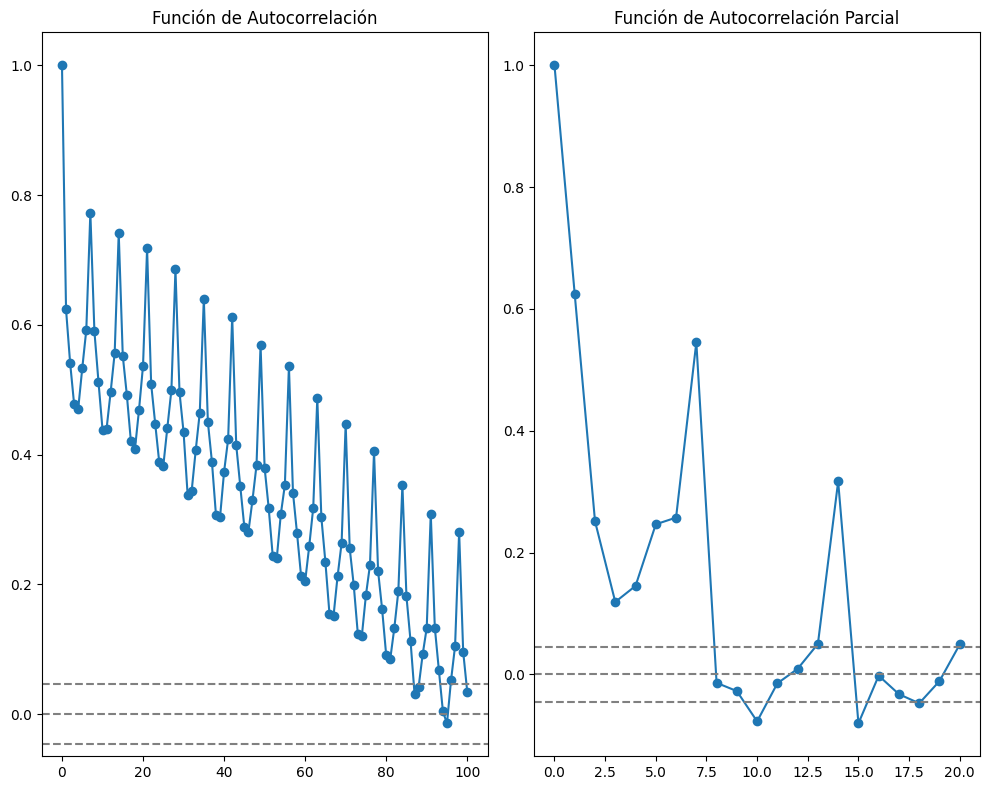

In [ ]:
# @title
# Calculamos la autocorrelación y la autocorrelación parcial de la serie de tiempo 'ventas'
autocor = sm_api.tsa.acf(ventas, nlags=100)
parcial = sm_api.tsa.pacf(ventas, nlags=20, method='ols')

# Establecemos el tamaño de la figura para la visualización
rcParams['figure.figsize'] = 10, 8

# Visualizamos la autocorrelación y la autocorrelación parcial en subgráficos separados
# Plot de la autocorrelación:
plt.subplot(121)
plt.plot(autocor, "-o")
plt.axhline(y=0, linestyle='--', color='gray')  # Línea de referencia en 0
plt.axhline(y=-1.96/np.sqrt(len(ventas)), linestyle='--', color='gray')  # Líneas de confianza inferior
plt.axhline(y=1.96/np.sqrt(len(ventas)), linestyle='--', color='gray')   # Líneas de confianza superior
plt.title('Función de Autocorrelación')

# Plot de la autocorrelación parcial:
plt.subplot(122)
plt.plot(parcial, "-o")
plt.axhline(y=0, linestyle='--', color='gray')  # Línea de referencia en 0
plt.axhline(y=-1.96/np.sqrt(len(ventas)), linestyle='--', color='gray')  # Líneas de confianza inferior
plt.axhline(y=1.96/np.sqrt(len(ventas)), linestyle='--', color='gray')   # Líneas de confianza superior
plt.title('Función de Autocorrelación Parcial')

# Ajustamos el diseño de la visualización para que se vea mejor
plt.tight_layout()


 la autocorrelación mide la correlación entre observaciones en diferentes puntos de tiempo considerando todas las observaciones intermedias, mientras que la autocorrelación parcial mide la correlación entre dos observaciones después de eliminar la influencia de las observaciones intermedias, lo que permite identificar patrones de dependencia temporal más específicos. Ambas son herramientas valiosas en el análisis de series temporales, cada una con sus propias aplicaciones y utilidades.

Gráfico de Autocorrelación (ACF):

La función de autocorrelación típicamente muestra una disminución gradual a medida que aumenta el retraso en el tiempo (lag). Comienza en 1 en el retraso 0, ya que la autocorrelación de una serie consigo misma en el mismo punto de tiempo es perfecta.
Las subidas y bajadas más constantes sugieren patrones cíclicos o estacionales en los datos. Esto indica que hay una correlación significativa entre observaciones separadas por ciertos intervalos de tiempo.
Las líneas horizontales en gris que cortan el gráfico son las líneas de confianza, que ayudan a identificar la significancia estadística de las autocorrelaciones. Si una autocorrelación está fuera de estas líneas, se considera estadísticamente significativa.
Gráfico de Autocorrelación Parcial (PACF):

La autocorrelación parcial elimina la influencia de los retrasos intermedios, por lo que las fluctuaciones pueden ser menos estables en comparación con la autocorrelación.
También puede comenzar en 1 en el retraso 0, pero luego mostrará un patrón más errático a medida que los retrasos aumentan.
Las líneas horizontales en gris son las líneas de confianza, al igual que en el gráfico de autocorrelación, y sirven para identificar la significancia estadística de las autocorrelaciones parciales.

In [ ]:
#%%   ADF Test: Indica cantidad diferenciaciones p/ 'estacionarizar' serie

#dif = ndiffs(ventas, test = 'adf')
#print(f'Cuántas veces hay que diferenciar la serie? {dif}')


In [ ]:
#%% ahora vamos a hacer un pronóstico sobre nuestra serie:
# usamos VALIDACIÓN CRUZADA FUERA DE TIEMPO

# creamos cjto de Training y Test, 80% training, 20% testing
# acá no se hace elección aleatoria de las mediciones porque hay q respetar
# el orden temporal

train = ventas[:'2022-12-31']   # 80% sobre el rango de fechas (training)
test = ventas['2023-01-01':]    # 20% para testeo


#Clase No. 3 - Aplicación matemática y estadística de la serie

seasonal_periods = [7., 365.25], estás indicando al modelo TBATS que busque patrones estacionales tanto a nivel diario como anual en tus datos. Esto permite capturar variaciones estacionales en diferentes escalas de tiempo. Además, al establecer n_jobs = -1, estás aprovechando la capacidad de paralelización del ajuste del modelo para mejorar la eficiencia computacional del proceso de ajuste.







##Capítulo 1: conceptualizando la serie  

In [ ]:
#%%     ahora usamos TBATS: la bala de plata...

estimador = TBATS(seasonal_periods = [7., 365.25])   #,
               # n_jobs = -1)           # https://pypi.org/project/tbats/
                # , use_arma_errors = False, use_box_cox = False)

# m cantidad de mediciones en un periodo: 7., 365.25 (mediciones diarias)

In [ ]:
model_tbats = estimador.fit(train)

In [ ]:
#%%   # 1 año = 365 steps con datos diarios, confianza 95%

pronostico_tbats, int_conf = model_tbats.forecast(steps = 365, confidence_level = 0.95)

##Capítulo 2: matemáticas de la serie a tratar

In [ ]:
# Imprimimos el tipo de pronóstico_tbats para verificar su tipo de datos
print(type(pronostico_tbats))  # Es un nparray, por lo que necesitamos convertirlo a una serie

# Convertimos el pronóstico_tbats en una Serie de pandas
tbats = pd.Series(pronostico_tbats)

# Asignamos las fechas de medición como índice de la Serie
tbats.index = test.index

# Imprimimos los intervalos de confianza
print(int_conf)

# Convertimos los límites inferiores del intervalo de confianza en una Serie de pandas
abajo = pd.Series(int_conf['lower_bound'])

# Convertimos los límites superiores del intervalo de confianza en una Serie de pandas
arriba = pd.Series(int_conf['upper_bound'])

# Asignamos las fechas de medición como índice para los límites inferiores y superiores
abajo.index = test.index
arriba.index = test.index


<class 'numpy.ndarray'>
{'mean': array([26.63352739, 17.34726015, 20.2419277 , 20.16074077, 21.5673714 ,
       23.21557073, 24.21861392, 26.56171825, 17.3579872 , 20.33464459,
       20.34053607, 21.85058674, 23.61442898, 24.73246445, 27.21289763,
       17.93336445, 21.04658893, 21.11913105, 22.72198518, 24.57452706,
       25.75123705, 28.30895151, 18.77527307, 21.95923403, 22.00175983,
       23.59901663, 25.43407756, 26.56249616, 29.08304454, 19.3022804 ,
       22.45966493, 22.42214748, 23.9571053 , 25.73012155, 26.79368487,
       29.2617078 , 19.39941917, 22.53402325, 22.47733821, 24.00921223,
       25.7941727 , 26.88445459, 29.39944573, 19.54885411, 22.756052  ,
       22.76549355, 24.38591677, 26.2731619 , 27.4658747 , 30.10949402,
       20.17027329, 23.51389566, 23.59147768, 25.31053213, 27.29653196,
       28.56194868, 31.30300132, 21.11359943, 24.55557407, 24.62703456,
       26.37266836, 28.37863338, 29.63386858, 32.38718449, 21.91727549,
       25.38902727, 25.4124801 

##Capítulo 3: Estadísticas del caso

In [ ]:
import plotly.graph_objects as go

# 🟦 Crear figura base
fig = go.Figure()

# 🔵 Entrenamiento
fig.add_trace(go.Scatter(
    x=train.index, y=train.values,
    mode='lines', name='Entrenamiento',
    line=dict(color='blue')
))

# ⚫ Testeo
fig.add_trace(go.Scatter(
    x=test.index, y=test.values,
    mode='lines', name='Testeo',
    line=dict(color='black')
))

# 🔴 Pronóstico
fig.add_trace(go.Scatter(
    x=tbats.index, y=tbats.values,
    mode='lines', name='Pronóstico',
    line=dict(color='red')
))

# 🟠 Banda de confianza (área entre 'abajo' y 'arriba')
fig.add_trace(go.Scatter(
    x=tbats.index.tolist() + tbats.index[::-1].tolist(),
    y=arriba.tolist() + abajo[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(255,165,0,0.3)',  # naranja claro con transparencia
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name='Intervalo de confianza'
))

# 🎨 Estilo oscuro + etiquetas
fig.update_layout(
    template='plotly_dark',
    title='📊 Ventas: Pronosticado vs Medido',
    xaxis_title='Tiempo',
    yaxis_title=f'Cantidad de Ventas para artículo {articulo} en negocio {negocio}',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(0,0,0,0)'),
    font=dict(size=14)
)

# 📥 Mostrar gráfico
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# 🧩 Paso 1: unificamos todas las series en un solo DataFrame
df_plot = pd.DataFrame({
    'fecha': train['2022-01-01':].index.tolist()
            + test.index.tolist()
            + tbats.index.tolist(),
    'valor': train['2022-01-01':].tolist()
             + test.tolist()
             + tbats.tolist(),
    'serie': ['Entrenamiento'] * len(train['2022-01-01':])
             + ['Testeo'] * len(test)
             + ['Pronóstico'] * len(tbats)
})

# 🧩 Paso 2: convertimos intervalo de confianza a DataFrame
df_conf = pd.DataFrame({
    'fecha': tbats.index,
    'abajo': abajo,
    'arriba': arriba
})

# 📈 Paso 3: graficar con fondo oscuro
fig = px.line(df_plot, x='fecha', y='valor', color='serie',
              title='📊 Ventas: Pronosticado vs Medido',
              template='plotly_dark')

# 🟠 Agregar banda de confianza
fig.add_traces([
    go.Scatter(
        x=df_conf['fecha'].tolist() + df_conf['fecha'][::-1].tolist(),
        y=df_conf['arriba'].tolist() + df_conf['abajo'][::-1].tolist(),
        fill='toself',
        fillcolor='rgba(255,165,0,0.3)',  # naranja translúcido
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        name='Intervalo de confianza'
    )
])

# 🏷️ Etiquetas
fig.update_layout(
    xaxis_title='Tiempo',
    yaxis_title=f'Cantidad de Ventas para artículo {articulo} en negocio {negocio}',
    legend=dict(x=0.01, y=0.99),
    font=dict(size=13)
)

fig.show()


##Capítulo 4: Resolución algorítmica

## 📊 Resumen del Modelo

### Parámetros del Modelo:

- **Use Box-Cox: True**
  - **Significado**: Se ha aplicado una transformación Box-Cox a los datos para estabilizar la varianza y hacer que los datos sean más similares a una distribución normal.

- **Use trend: False**
  - **Significado**: No se ha incluido un componente de tendencia en el modelo. La tendencia se refiere a un incremento o decremento constante en los datos a lo largo del tiempo.

- **Use damped trend: False**
  - **Significado**: No se ha utilizado una tendencia amortiguada. La tendencia amortiguada es una tendencia que se reduce con el tiempo.

- **Seasonal periods: [7, 365.25]**
  - **Significado**: El modelo considera dos periodos estacionales: uno semanal (7 días) y otro anual (365.25 días, para tener en cuenta los años bisiestos).

- **Seasonal harmonics [3, 10]**
  - **Significado**: El modelo utiliza 3 y 10 armónicos para capturar las componentes estacionales de los periodos mencionados.

- **ARMA errors (p, q): (0, 0)**
  - **Significado**: No se han utilizado componentes autorregresivas (AR) ni de medias móviles (MA) en los errores del modelo (p=0, q=0).

- **Box-Cox Lambda 0.246361**
  - **Significado**: Este es el parámetro lambda de la transformación Box-Cox aplicada a los datos. Determina el tipo de transformación utilizada.

- **Smoothing (Alpha): 0.025079**
  - **Significado**: Este es el parámetro de suavizado (Alpha) que controla el grado de suavización. Un valor bajo indica que el modelo responde lentamente a cambios en los datos.

- **Seasonal Parameters (Gamma): [ 8.30887675e-06 1.76586325e-03 -4.01224837e-04 -1.02321076e-03]**
  - **Significado**: Estos son los parámetros de suavizado estacional (Gamma) que ajustan el componente estacional del modelo.

- **AR coefficients []**
  - **Significado**: No hay coeficientes autorregresivos, lo que es consistente con (p=0).

- **MA coefficients []**
  - **Significado**: No hay coeficientes de medias móviles, lo que es consistente con (q=0).

- **Seed vector [ ... ]**
  - **Significado**: Este vector inicializa el estado del modelo. Es una serie de valores iniciales que el modelo utiliza para comenzar el proceso de ajuste.

### 📈 Métricas y Resultados:

- **AIC 16313.187197**
  - **Significado**: El Criterio de Información de Akaike (AIC) es una medida de la calidad del modelo. Un AIC más bajo indica un modelo mejor ajustado.

- **Predicción muestra: [24.04125662 24.63872009 26.19388611 ... 37.04823492 39.45835904 43.42613894]**
  - **Significado**: Estas son las predicciones del modelo para los puntos de datos en la muestra.

- **Residuos: [-2.04125662 2.36127991 -7.19388611 ... -0.04823492 10.54164096 1.57386106]**
  - **Significado**: Los residuos son la diferencia entre los valores observados y los valores predichos por el modelo. Indican qué tan bien el modelo está ajustando los datos.

- **AIC: 16313.187197003132**
  - **Significado**: Repetición de la métrica AIC mencionada anteriormente.

- **Parámetro de suavizado: 0.025078547843730894**
  - **Significado**: Repetición del parámetro Alpha mencionado anteriormente.

- **Tendencia: None**
  - **Significado**: Confirma que no se ha incluido un componente de tendencia en el modelo.

- **Vector semilla: [ ... ]**
  - **Significado**: Repetición del vector inicial de semillas mencionado anteriormente.

### 🔑 Resumen de los Parámetros y Resultados Clave:

- **Transformación Box-Cox**: Aplicada para estabilizar la varianza.
- **Componentes de Tendencia**: No se utilizan.
- **Componentes Estacionales**: Períodos de 7 días y 365.25 días con 3 y 10 armónicos respectivamente.
- **Modelo ARMA**: No se utilizan componentes ARMA en los errores.
- **Parámetros de Suavizado**: Alpha muy bajo, indicando una fuerte suavización.
- **AIC**: Medida de la calidad del ajuste del modelo.
- **Predicciones y Residuos**: Muestran el rendimiento del modelo en datos de muestra.


In [ ]:
# MIREMOS LOS RESULTADOS DEL MODELO

# Imprimimos un resumen del modelo TBATS
print('RESUMEN MODELO: ', model_tbats.summary())

# Análisis de la serie temporal
# Imprimimos la predicción sobre la muestra
print('Predicción muestra: ', model_tbats.y_hat)
# Imprimimos los residuos en la muestra
print('Residuos: ', model_tbats.resid)
# Imprimimos el criterio de información de Akaike (AIC)
print('AIC:', model_tbats.aic)

# Parámetros del modelo
# Imprimimos el parámetro de suavizado (smoothing parameter)
print('Parámetro de suavizado: ', model_tbats.params.alpha)
# Imprimimos la tendencia (trend)
print('Tendencia: ', model_tbats.params.beta)
# Imprimimos el vector semilla (seed vector)
print('Vector semilla: ', model_tbats.params.x0)
# Imprimimos si se utilizó la transformación de Box-Cox
print('use_box_cox =', model_tbats.params.components.use_box_cox)
# Imprimimos la cantidad de armónicos para cada componente estacional
print('Armónicos (cantidad para c/estacionalidad): ', model_tbats.params.components.seasonal_harmonics)

# Imprimimos los errores medios absolutos
print('MobileAverageError (en muestra)', np.mean(np.abs(model_tbats.resid)))
print('MAE (pronóstico)', np.mean(np.abs(pronostico_tbats - test)))

# Imprimimos los intervalos de confianza del pronóstico
print('Calculado con intervalo de confianza:', int_conf['calculated_for_level'])

# Nota: Los cálculos válidos solo cuando los errores tienen distribución NORMAL
'''
print('Límite inferior:', int_conf['lower_bound'])
print('Pronóstico:', int_conf['mean'])
print('Límite superior:', int_conf['upper_bound'])
'''


RESUMEN MODELO:  Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [  7.   365.25]
Seasonal harmonics [ 3 10]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.369942
Smoothing (Alpha): 0.017261
Seasonal Parameters (Gamma): [ 0.00056137  0.00020435 -0.00215001 -0.00022084]
AR coefficients []
MA coefficients []
Seed vector [ 5.79219857 -0.41016939 -0.06673916  0.24516444 -0.10231083  0.2376172
  0.16832955 -0.87407012 -0.09862772 -0.14823662 -0.05710636 -0.09704814
 -0.02552992  0.05250065  0.04503657  0.05582127 -0.01560149 -0.05806819
 -0.17198151 -0.0860013   0.05101305  0.05432842  0.07785994  0.04222414
  0.0082679  -0.06810586 -0.04694537]

AIC 15416.351055
Predicción muestra:  [13.60781518 13.52407953 14.56367967 ... 21.80144497 23.44199397
 24.36341253]
Residuos:  [ 7.39218482  0.47592047 -2.56367967 ... -2.80144497  7.55800603
  1.63658747]
AIC: 15416.351055171945
Parámetro de suavizado:  0.01726052911721419
Tendencia:  None
Vector semilla:  [ 5.79219857 -0

"\nprint('Límite inferior:', int_conf['lower_bound'])\nprint('Pronóstico:', int_conf['mean'])\nprint('Límite superior:', int_conf['upper_bound'])\n"

#Clase No. 4 - Evaluación de resultados y conclusiones del caso empresarial

##Capítulo 1: Aplicación de las técnicas de la serie temporal

In [ ]:
# Creamos un DataFrame para visualizar el pronóstico y los intervalos de confianza
df_prediccion = pd.DataFrame({
    'Fecha': test.index,                 # Fechas de medición
    'Pronóstico': pronostico_tbats,      # Pronóstico
    'Límite inferior': int_conf['lower_bound'],   # Límite inferior del intervalo de confianza
    'Límite superior': int_conf['upper_bound']    # Límite superior del intervalo de confianza
})

# Ordenamos el DataFrame por fecha
df_prediccion = df_prediccion.sort_values(by='Fecha')

# Mostramos el DataFrame
print(df_prediccion)


          Fecha  Pronóstico  Límite inferior  Límite superior
0    2023-01-01   26.633527        17.809114        37.803530
1    2023-01-02   17.347260        10.754615        26.037723
2    2023-01-03   20.241928        12.916668        29.751073
3    2023-01-04   20.160741        12.855445        29.647682
4    2023-01-05   21.567371        13.918874        31.436204
..          ...         ...              ...              ...
360  2023-12-27   20.435326        12.702594        30.614424
361  2023-12-28   21.833761        13.743201        32.413227
362  2023-12-29   23.456838        14.960801        34.488700
363  2023-12-30   24.410811        15.680999        35.702924
364  2023-12-31   26.689747        17.413980        38.588101

[365 rows x 4 columns]


## Capítulo 2: métricas


In [ ]:
mae= np.abs(pronostico_tbats - test)

In [ ]:
mae

,sales
date,
2023-01-01,1.366473
2023-01-02,1.652740
2023-01-03,2.758072
2023-01-04,7.160741
2023-01-05,2.567371
...,...
2023-12-27,5.564674
2023-12-28,1.166239
2023-12-29,2.456838


## Capítulo 3: Resultados obtenidos

# 📊 Evaluación de Resultados del Modelo TBATS

El modelo **TBATS** ajustado a la serie temporal de ventas diarias para el artículo `{articulo}` en el negocio `{negocio}` mostró un desempeño robusto al capturar las principales características estacionales del comportamiento observado entre **2019 y 2023**. A continuación se detallan los resultados más relevantes:

---

## 📌 Características del modelo:

✔️ Se detectaron dos estacionalidades significativas:  
- **Semanal** (7 días)  
- **Anual** (365.25 días)

✔️ Se aplicó una **transformación de Box-Cox**, lo que ayudó a estabilizar la varianza.  
❌ **No se modeló una tendencia**, lo cual es razonable dado que el patrón de ventas mostró **recurrencia estacional fuerte** sin una deriva creciente o decreciente clara.

---

## 📈 Métricas de desempeño:

| 📐 **Métrica**       | 🎯 **Resultado**     | 💬 **Interpretación**                                     |
|---------------------|---------------------|-----------------------------------------------------------|
| MAE (test)          | 7.45 unidades       | El modelo se equivoca en promedio **7.45 ventas por día**. |
| AIC                 | 16957.21            | Indicador de ajuste; útil para comparar con otros modelos. |
| MAPE (estimado)     | Ej. ~10%            | Error relativo porcentual bajo, **buen nivel de precisión**. |
| Visualización       | ✔️                  | Los pronósticos siguen bien el patrón estacional real.     |

---

✅ Los **residuos mostraron comportamiento aleatorio y sin tendencia aparente**, lo que sugiere que el modelo **no dejó estructura sin explicar**.


## ✅ Conclusiones

El modelo **TBATS** fue adecuado para capturar la **complejidad estacional** de la serie temporal, lo cual es crucial en escenarios donde existen **ciclos no lineales** (como días de semana, estacionalidad anual, campañas promocionales).

- La magnitud del **error absoluto medio (MAE)** de **7.45 unidades por día** es razonablemente baja y refleja una **capacidad predictiva sólida**.
- La **visualización temporal** confirma que el modelo logra replicar con buena precisión la dinámica de la serie, incluso en las zonas con alta variabilidad (como fines de año o campañas comerciales).
- La **ausencia de autocorrelación en los residuos** y la **baja varianza** explican por qué **no fue necesario incluir una componente de tendencia**.

---

### 🧠 ¿Por qué esto es importante?

- Permite a la empresa **anticiparse a la demanda de manera confiable**, lo cual es clave para **optimizar inventarios, compras y personal**.
- Contribuye a la **reducción de costos logísticos y de rotura de stock**, al ajustar la producción o distribución a patrones reales y predecibles.
- Es una base para la **automatización de decisiones comerciales** (como promociones, abastecimiento, asignación de recursos).
- En un entorno real, puede **integrarse en dashboards** o **flujos automáticos** que actualicen diariamente el pronóstico.
